In [1]:
from qTools import *
settings.trueVals = True
import Cahit as ck

import scipy.sparse as sp

import numpy as np

from functools import partial
from multiprocessing import Pool, cpu_count

import matplotlib.pyplot as plt
import datetime

import copy

In [ ]:
print(units.hbar)

In [ ]:
print(isinstance(sigmam.__name__, str))

In [2]:
resonatorDimension = 20
g = 1.79
qfreq = 2
resFreq = 2

In [3]:
qSim = Simulation()
qSim.finalTime = 1.2
qSim.stepSize = 0.02
qSim.delStates = True

In [4]:
JCSys = QuantumSystem(name='JCSys')

In [ ]:
JCSys._genericQSys__unitary

In [5]:
cav = Cavity(dimension=resonatorDimension, frequency=resFreq)
JCSys.addSubSys(cav)

qub = JCSys.createSubSys(Qubit)
qub.frequency = qfreq

Cavity requires a dimension
Qubit requires a dimension


In [ ]:
print(JCSys.)

In [ ]:
print(qSim.save())
print(JCSys.save())
print(qub.save())

In [ ]:
copyJC = JCSys.copy()

In [ ]:
print(copyJC.subSys['Cavity2'].dimension)

In [ ]:
copyQub = qub.copy()
copyCav = cav.copy()

In [ ]:
print(copyQub.name)
print(copyCav.name)
print(copyCav.dimension)

In [ ]:
qub2 = qub.__class__(dimension=2, frequency=2)

In [ ]:
qub2.frequency

In [6]:
JCcoupling = JCSys.JC(cav, qub, g)

#JCSys.initialState = [0,0]
cav.initialState = 0
qub.initialState = basis(2,0)

In [ ]:
print(cav.ind)

In [ ]:
print(len(JCSys.subSys))

In [7]:
#digitalRabi = qProtocol(superSys=JCSys, subSys= [JCunitary, AJCunitary, JCunitary] name='RabiResults')

JCunitary = freeEvolution(ratio=0.5, superSys=JCSys)
qubset = JCunitary.createUpdate(system=qub, key='frequency', value=0)

#AJCunitary = qProtocol()
bitFlip = xGate(implementation='instant', superSys=qub)
AJC = freeEvolution(superSys=JCSys)

#AJCunitary.addStep(bitFlip, AJC, bitFlip)
AJCunitary = qProtocol(steps=[bitFlip, AJC, bitFlip])
digitalRabi = qProtocol(superSys=JCSys, steps=[JCunitary, AJCunitary, JCunitary], name='DigitalRabi')

#digitalRabi.addStep(JCunitary, AJCunitary, JCunitary)

In [8]:
qSim.addSubSys(JCSys, digitalRabi)

In [ ]:
print(qubset.subSys)

In [ ]:
print(qSim.subSys)

In [9]:
qubFreqSweep = qSim.Sweep.createSweep(system=qub, sweepKey='frequency', sweepList=np.arange(0, 1+0.5, 0.5))
cavFreqSweep = qSim.Sweep.createSweep(system=cav, sweepKey='frequency', multiParam=True)
cavFreqSweep.sweepList = np.arange(-4, 4+0.1, 0.1)

In [ ]:
print(qSim.instNames)

In [ ]:
JCSys.name+digitalRabi.name+'Results'

In [ ]:
print(qSim.getResultByName(JCSys.name+digitalRabi.name+'Results') is digitalRabi.qRes)

In [ ]:
print(q)

In [10]:
cavParity = parityEXP(cav.freeMat)
qubPop = qub.freeMat

def calcTry(qSim, qSystems, qEvols):
    qSim.qRes.calculated = ['try', 1]

qSim.calculate = calcTry

def calcTrySweep(sweep, qSystems, qEvols):
    sweep.qRes.calculated = ['try', qSim.qSystems[0].subSys['Cavity1'].frequency]

qSim.Sweep.calculate = calcTrySweep

def expectn(qSim, state1):
    '''print(qSim.qRes.calculated['try'])
    print(qSim.Sweep.qRes.calculated['try'])'''

    #digitalRabi.qRes.results['cavParity'].append(expectationKet(cavParity, state1))
    qSim.qRes.results['cavParity'].append(expectationKet(cavParity, state1))
    #qSim.qRes.allResults['RabiResults'].results['cavParity'].append(expectationKet(cavParity, state1))
    qSim.getResultByName('JCSysResults').results['cavParity'].append(expectationKet(cavParity, state1))
    #qSim.qRes.qResults[digitalRabi].results['cavParity'].append(expectationKet(cavParity, state1))
    #qSim.qRes.results['cavParity2'].append(expectationKet(cavParity, state1))
    #qSim.qRes.result = fidelityKet(qSim.qSys.initialState, state1)

qSim.compute = expectn

In [ ]:
saveDict = qSim.save()
for k,v in saveDict.items():
    print(k,v)
    '''if k is 'qSystems':
        for key, val in v.items():
            print(key, val)'''

In [ ]:
qSim._freeEvol()
for qSys in qSim.subSys.values():
    # TODO this will be modified after the structural changes of qSys objects
    if isinstance(qSys, QuantumSystem):
        # TODO Check first if constructed
        qSys.constructCompSys()
for protoc in qSim.subSys.keys():
    # TODO tihis will be modified after the structural changes of qPro objects
    protoc.prepare(qSim)
qSim.Sweep.prepare()
for qres in qSim.qRes.allResults.values():
    qres._reset()

In [ ]:
print(digitalRabi.stepSize)

In [ ]:
qSim.stepSize = 0.01

In [ ]:
print(qub._qSystem__dimsAfter)

In [ ]:
print(qub._genericQSys__initialState)

In [ ]:
qSim._freeEvol()

In [ ]:
print(qSim.subSys)

In [ ]:
print(list(qSim.subSys.keys())[0].superSys)

In [ ]:
list(qSim.subSys.keys())[0].prepare(qSim)

In [ ]:
print(list(qSim.subSys.keys())[0].samples)

In [11]:
nw = datetime.datetime.now()

results = qSim.run(p=True, coreCount='all')

en = datetime.datetime.now()
print(en-nw)

0:00:06.963227


In [ ]:
print(qSim.qRes.name)

In [ ]:
print(digitalRabi._timeBase__inBound)

In [ ]:
for key in list(globals().keys()):
    if globals()[key] is JCSys:
        globals()[key] = 2.0

In [ ]:
print(JCunitary.stepSize)

In [ ]:
print([key for key, value in globals().items() if value is JCSys])

In [ ]:
print(qUniversal.instNames['copyStep1'].save())

In [12]:
path, fname = qSim.qRes.saveAll(fileName='trial', path='/Users/cahitkargi/Desktop', attributes=qSim.save())

In [ ]:
print(qSim.qRes.states.keys())
print(digitalRabi.qRes.states.keys())
print(qSim.qRes.states['RabiResults'] is digitalRabi.qRes.states['RabiResults'])

In [ ]:
print(len(qSim.qRes.states['RabiResults']))
print(len(digitalRabi.qRes.states['RabiResults']))
print(len(qSim.qRes.states['RabiResults'][0]))
print(len(digitalRabi.qRes.states['RabiResults'][0]))
print(len(qSim.qRes.states['RabiResults'][0][0]))
print(len(digitalRabi.qRes.states['RabiResults'][0][0]))

In [ ]:
print(len(qSim.qRes.results['cavParity']))
print(len(digitalRabi.qRes.results['cavParity']))

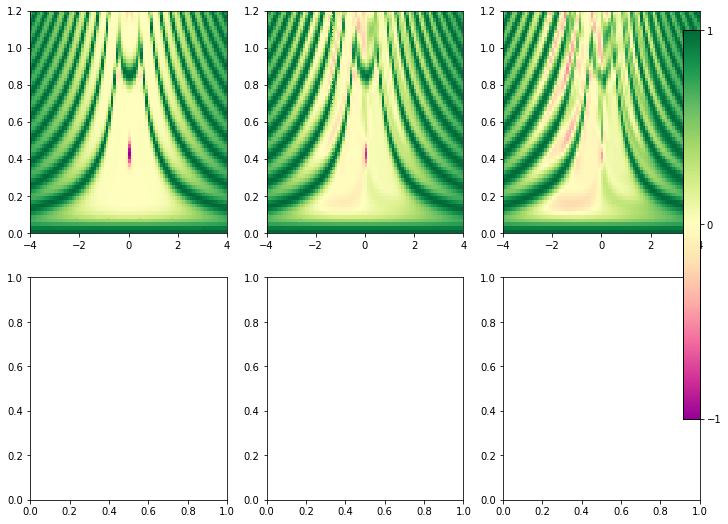

In [13]:
def plotRes(xList = cavFreqSweep.sweepList):
    fig = plt.figure(figsize=(12,9))
    setC = [0.88, 0.25, 0.02, 0.6]
    
    axGrids = ck.Plotting.Functions.grid(2, 3, fig=fig)

    ck.Plotting.SimplePlots.colorPlot(xList, [x*qSim.stepSize for x in range(qSim.stepCount+1)], qSim.qRes.results['cavParity'][0],ax=axGrids[0], gif=fig, setC=setC)
    ck.Plotting.SimplePlots.colorPlot(xList, [x*qSim.stepSize for x in range(qSim.stepCount+1)], qSim.qRes.results['cavParity'][1],ax=axGrids[1], gif=fig, setC=setC)
    ck.Plotting.SimplePlots.colorPlot(xList, [x*qSim.stepSize for x in range(qSim.stepCount+1)], qSim.qRes.results['cavParity'][2],ax=axGrids[2], gif=fig, setC=setC)
    '''ck.Plotting.SimplePlots.colorPlot(xList, [x*qSim.stepSize for x in range(qSim.steps+1)], digitalRabi.qRes.results['cavParity'][0],ax=axGrids[3], gif=fig, setC=setC)
    ck.Plotting.SimplePlots.colorPlot(xList, [x*qSim.stepSize for x in range(qSim.steps+1)], digitalRabi.qRes.results['cavParity'][1],ax=axGrids[4], gif=fig, setC=setC)
    ck.Plotting.SimplePlots.colorPlot(xList, [x*qSim.stepSize for x in range(qSim.steps+1)], digitalRabi.qRes.results['cavParity'][2],ax=axGrids[5], gif=fig, setC=setC)'''
    '''ck.Plotting.SimplePlots.colorPlot(xList, [x*qSim.stepSize for x in range(qSim.steps+1)], qSim.qRes.resres['cavParity2'][0],ax=axGrids[2], gif=fig, setC=setC)
    ck.Plotting.SimplePlots.colorPlot(xList, [x*qSim.stepSize for x in range(qSim.steps+1)], qSim.qRes.resres['cavParity2'][1],ax=axGrids[3], gif=fig, setC=setC)'''
plotRes(cavFreqSweep.sweepList)

In [ ]:
print(qResults._allResults)

In [ ]:
print(digitalRabi.qRes.name)

In [ ]:
qResults._allResults['Simulation1'].superSys = None

In [ ]:
qResults._allResults['Sweep1'].superSys = qub

In [ ]:
print(qResults._allResults)

In [ ]:
print(JCSys._genericQSys__unitary.qRes.name)

In [ ]:
print(hasattr(JCSys, '_paramUpdated'))

In [ ]:
print(JCcoupling.superSys)

In [ ]:
saveDict = qSim.save()
for k,v in saveDict.items():
    print(k,v)